In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
# library import
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, StandardScaler, 
                                   MinMaxScaler, PowerTransformer, QuantileTransformer)
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings(action='ignore')

In [5]:
df = pd.read_csv('C:/Users/BaekSoYun/Documents/방학프로젝트/insurance_dataset.csv/insurance_dataset.csv', engine='python')
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         1000000 non-null  object 
 7   family_medical_history  1000000 non-null  object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [7]:
df.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


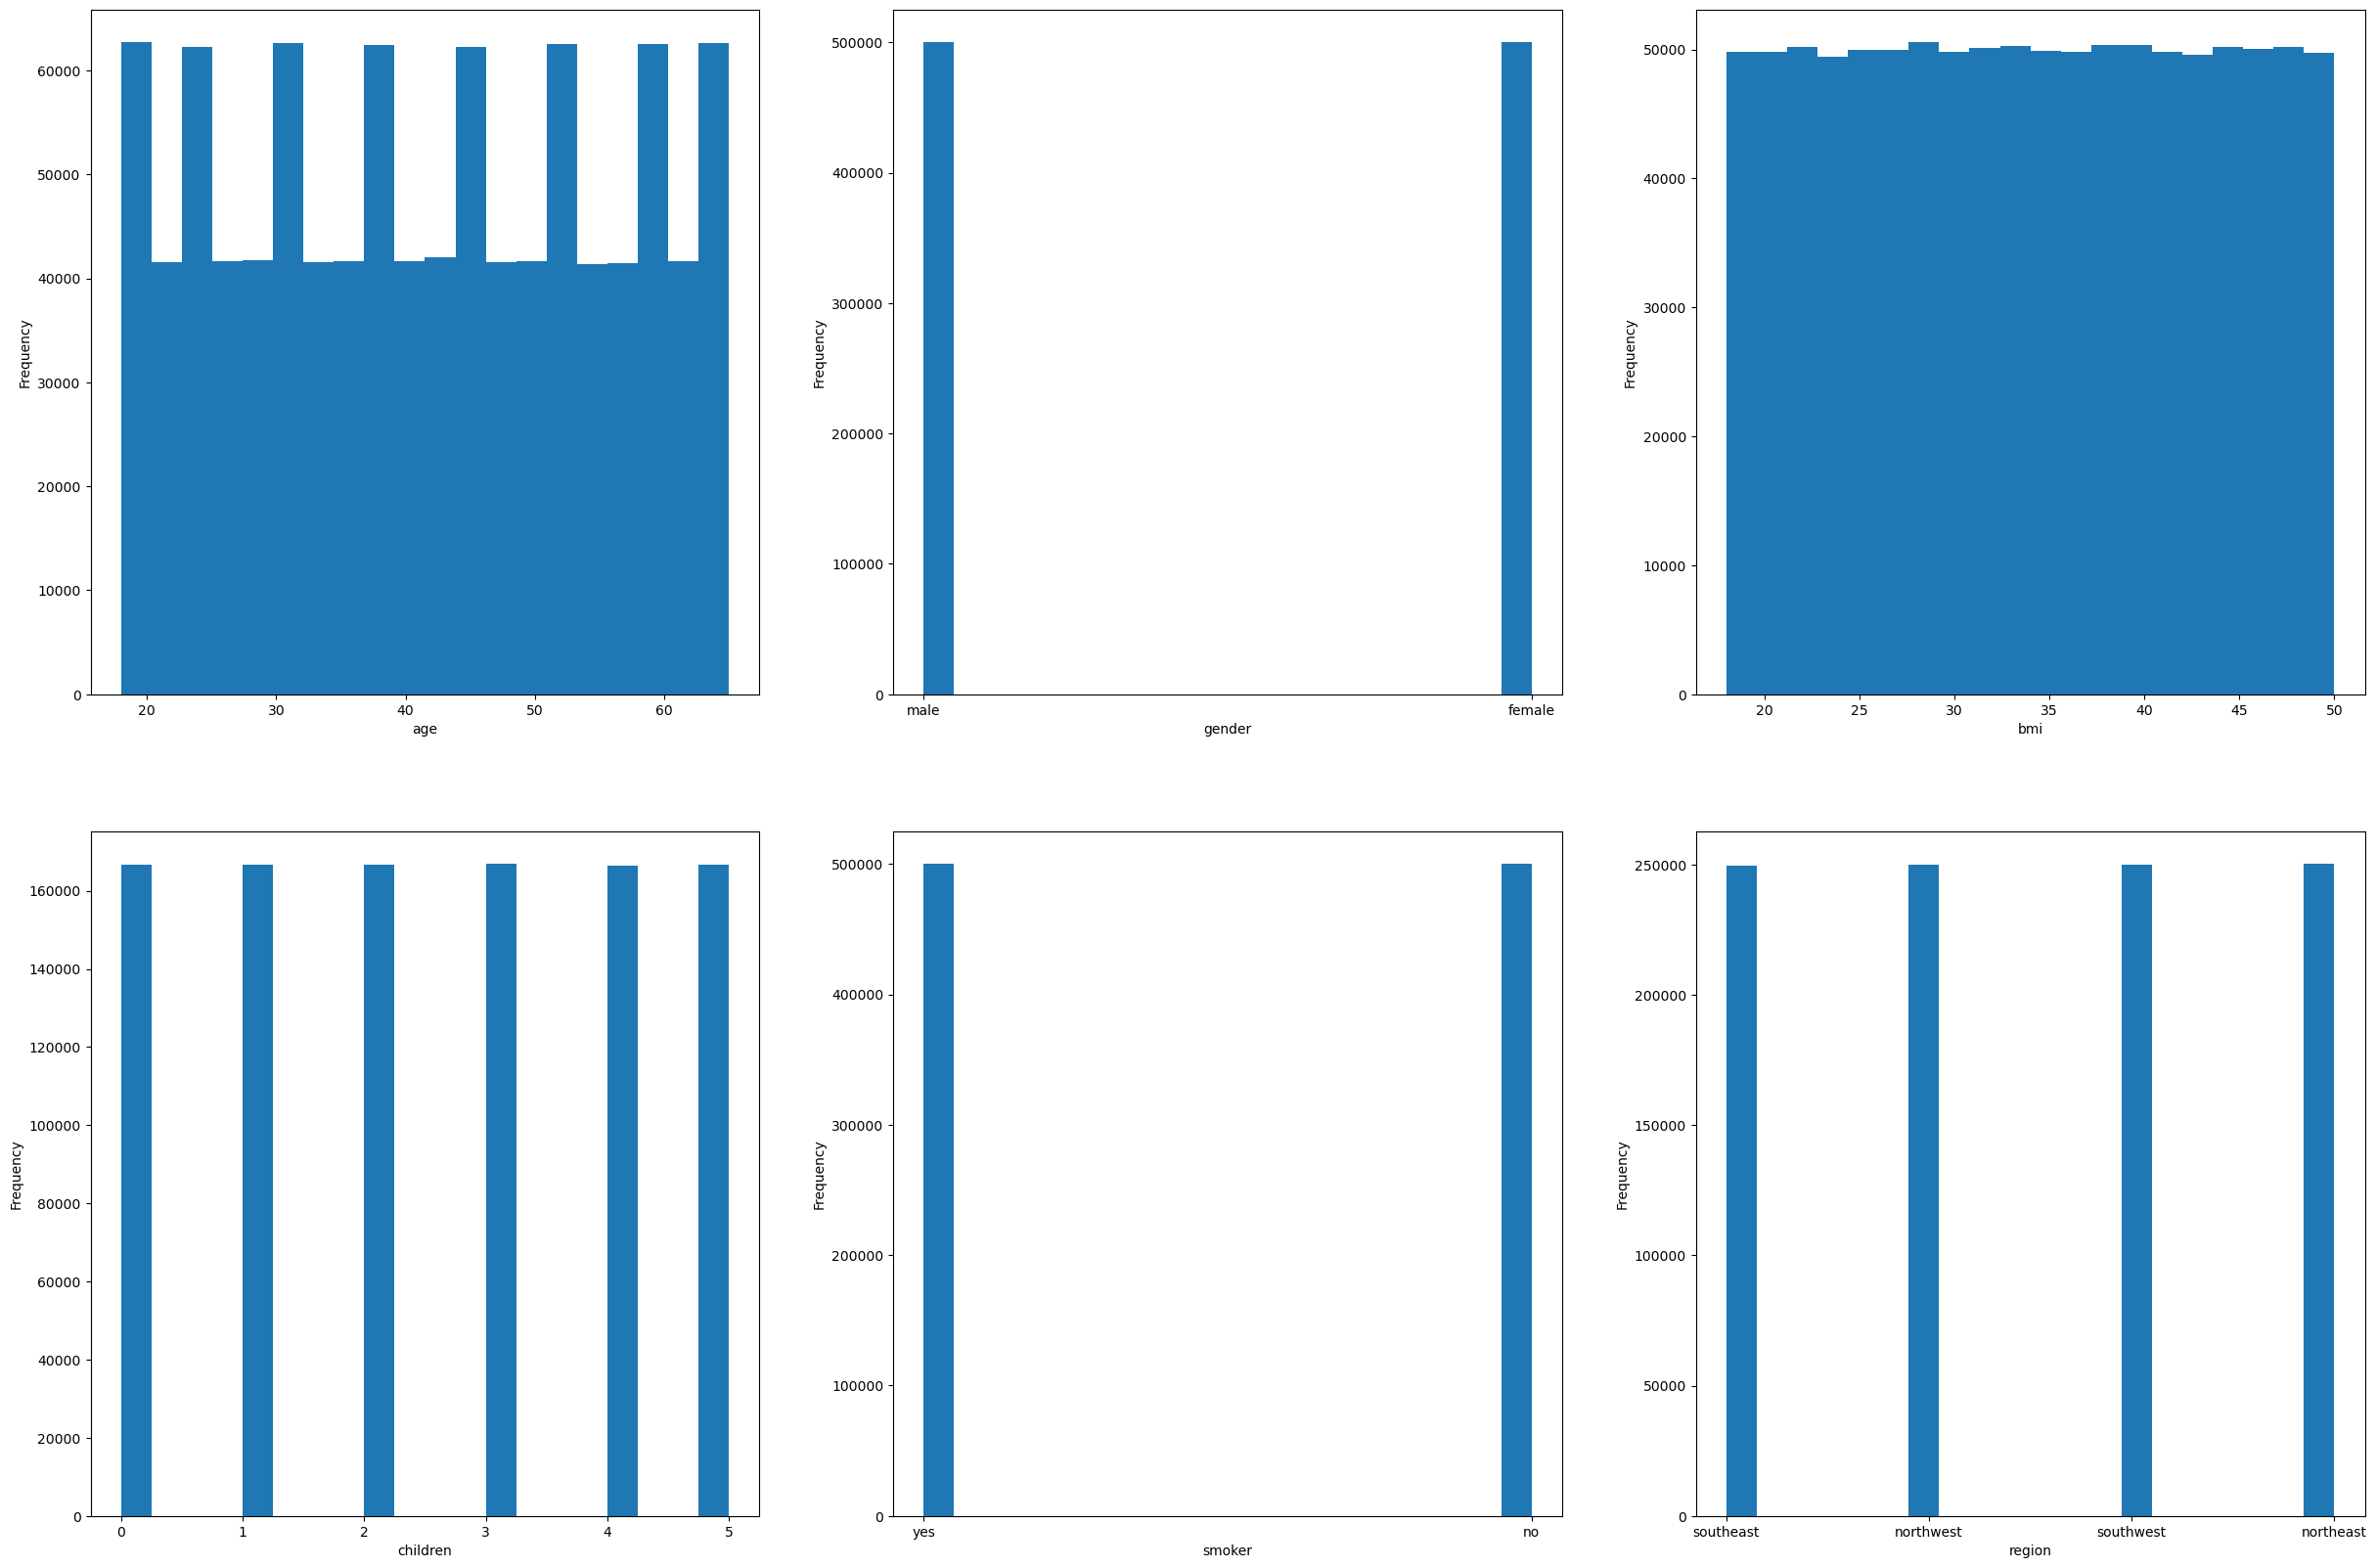

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))

idx = 0 
for i in range(2): 
    for j in range(3): 
        colname = list(df.columns)[idx]
        ax[i][j].hist(df[colname], bins=20)
        ax[i][j].set_xlabel(colname)
        ax[i][j].set_ylabel('Frequency')
        
        idx += 1

In [9]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.001428,-0.001317,0.063390
bmi,0.001428,1.000000,-0.001635,0.104429
children,-0.001317,-0.001635,1.000000,0.076801
charges,0.063390,0.104429,0.076801,1.000000


In [10]:
print(df['age'].min())
print(df['age'].max())

18
65


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

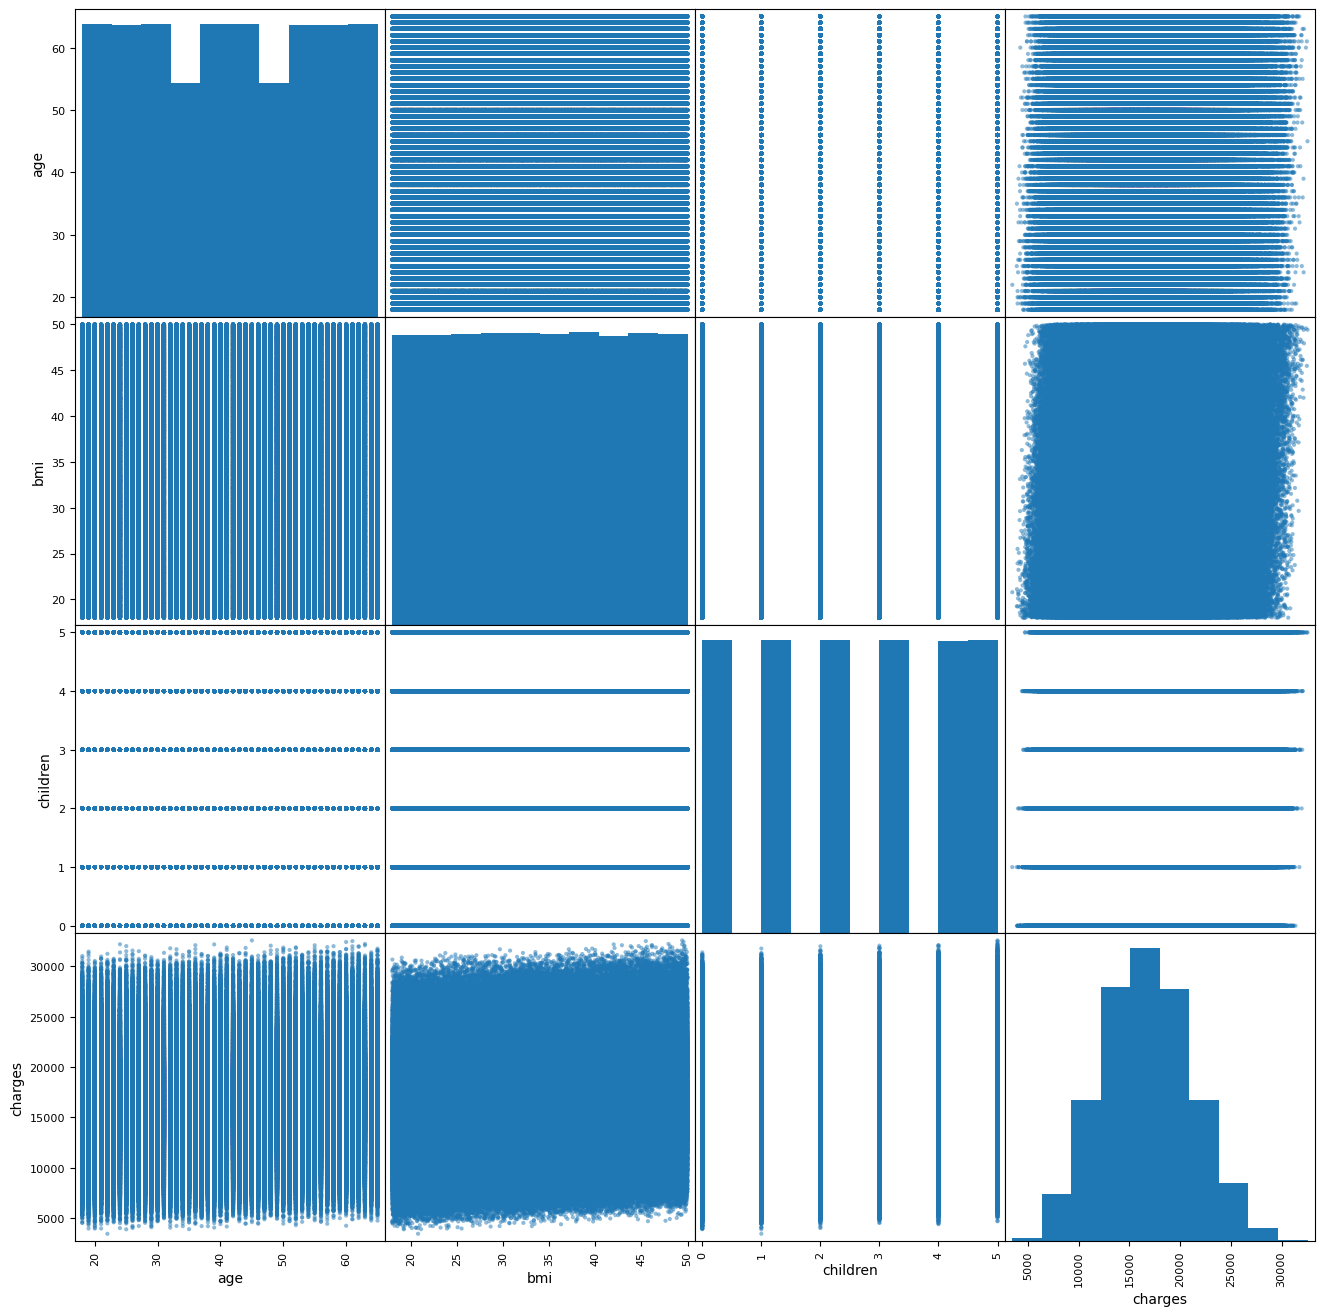

In [11]:
pd.plotting.scatter_matrix(df, figsize=(16, 16))

In [12]:
# 연령별 구간 
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, np.inf]
age_bin = pd.cut(df['age'], bins=bins, labels=[i+1 for i in range(len(bins)-1)])
df['age_bin'] = age_bin
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges,age_bin
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669,7
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218,2
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302,5
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843,2
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838,7


<AxesSubplot:ylabel='bmi'>

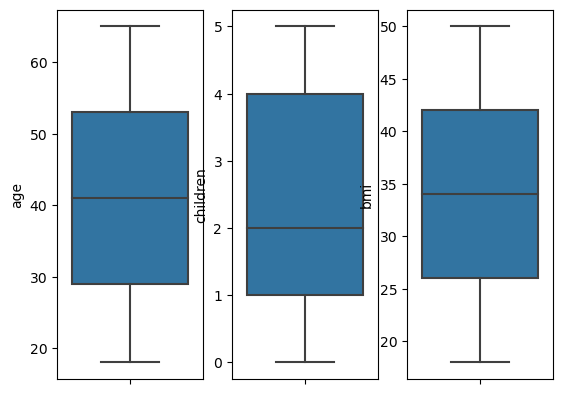

In [13]:
# 이상치 탐지를 위해 boxplot을 그리기.
plt.subplot(1,3,1)
sns.boxplot(data=df, y='age')
plt.subplot(1,3,2)
sns.boxplot(data=df, y='children')
plt.subplot(1,3,3)
sns.boxplot(data=df, y='bmi')

In [14]:
# IQR(Q3 - Q1)로부터 이상치 파악하기
bmi_q1 = df['bmi'].quantile(q=0.25)
bmi_q3 = df['bmi'].quantile(q=0.75)
iqr = bmi_q3 - bmi_q1

# (q1 - (iqr * 1.5))와 (q3 + (iqr * 1.5))를 벗어난 값이 이상치입니다.
condi1 = (df['bmi'] < (bmi_q1 - (1.5 * iqr)))
condi2 = (df['bmi'] > (bmi_q3 + (1.5 * iqr)))
outliers = df[condi1 | condi2]
outliers['bmi']

Series([], Name: bmi, dtype: float64)

In [15]:
outliers

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges,age_bin


In [16]:
df.drop(outliers.index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   age                     1000000 non-null  int64   
 1   gender                  1000000 non-null  object  
 2   bmi                     1000000 non-null  float64 
 3   children                1000000 non-null  int64   
 4   smoker                  1000000 non-null  object  
 5   region                  1000000 non-null  object  
 6   medical_history         1000000 non-null  object  
 7   family_medical_history  1000000 non-null  object  
 8   exercise_frequency      1000000 non-null  object  
 9   occupation              1000000 non-null  object  
 10  coverage_level          1000000 non-null  object  
 11  charges                 1000000 non-null  float64 
 12  age_bin                 1000000 non-null  category
dtypes: category(1), float64(2), int64(2), objec

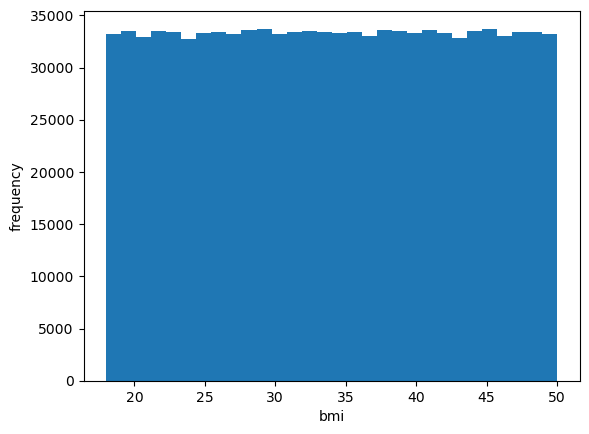

In [18]:
# bmi 분포.
plt.figsize = (10, 10)
plt.hist(df['bmi'], bins=30)
plt.xlabel('bmi')
plt.ylabel('frequency')
plt.show()

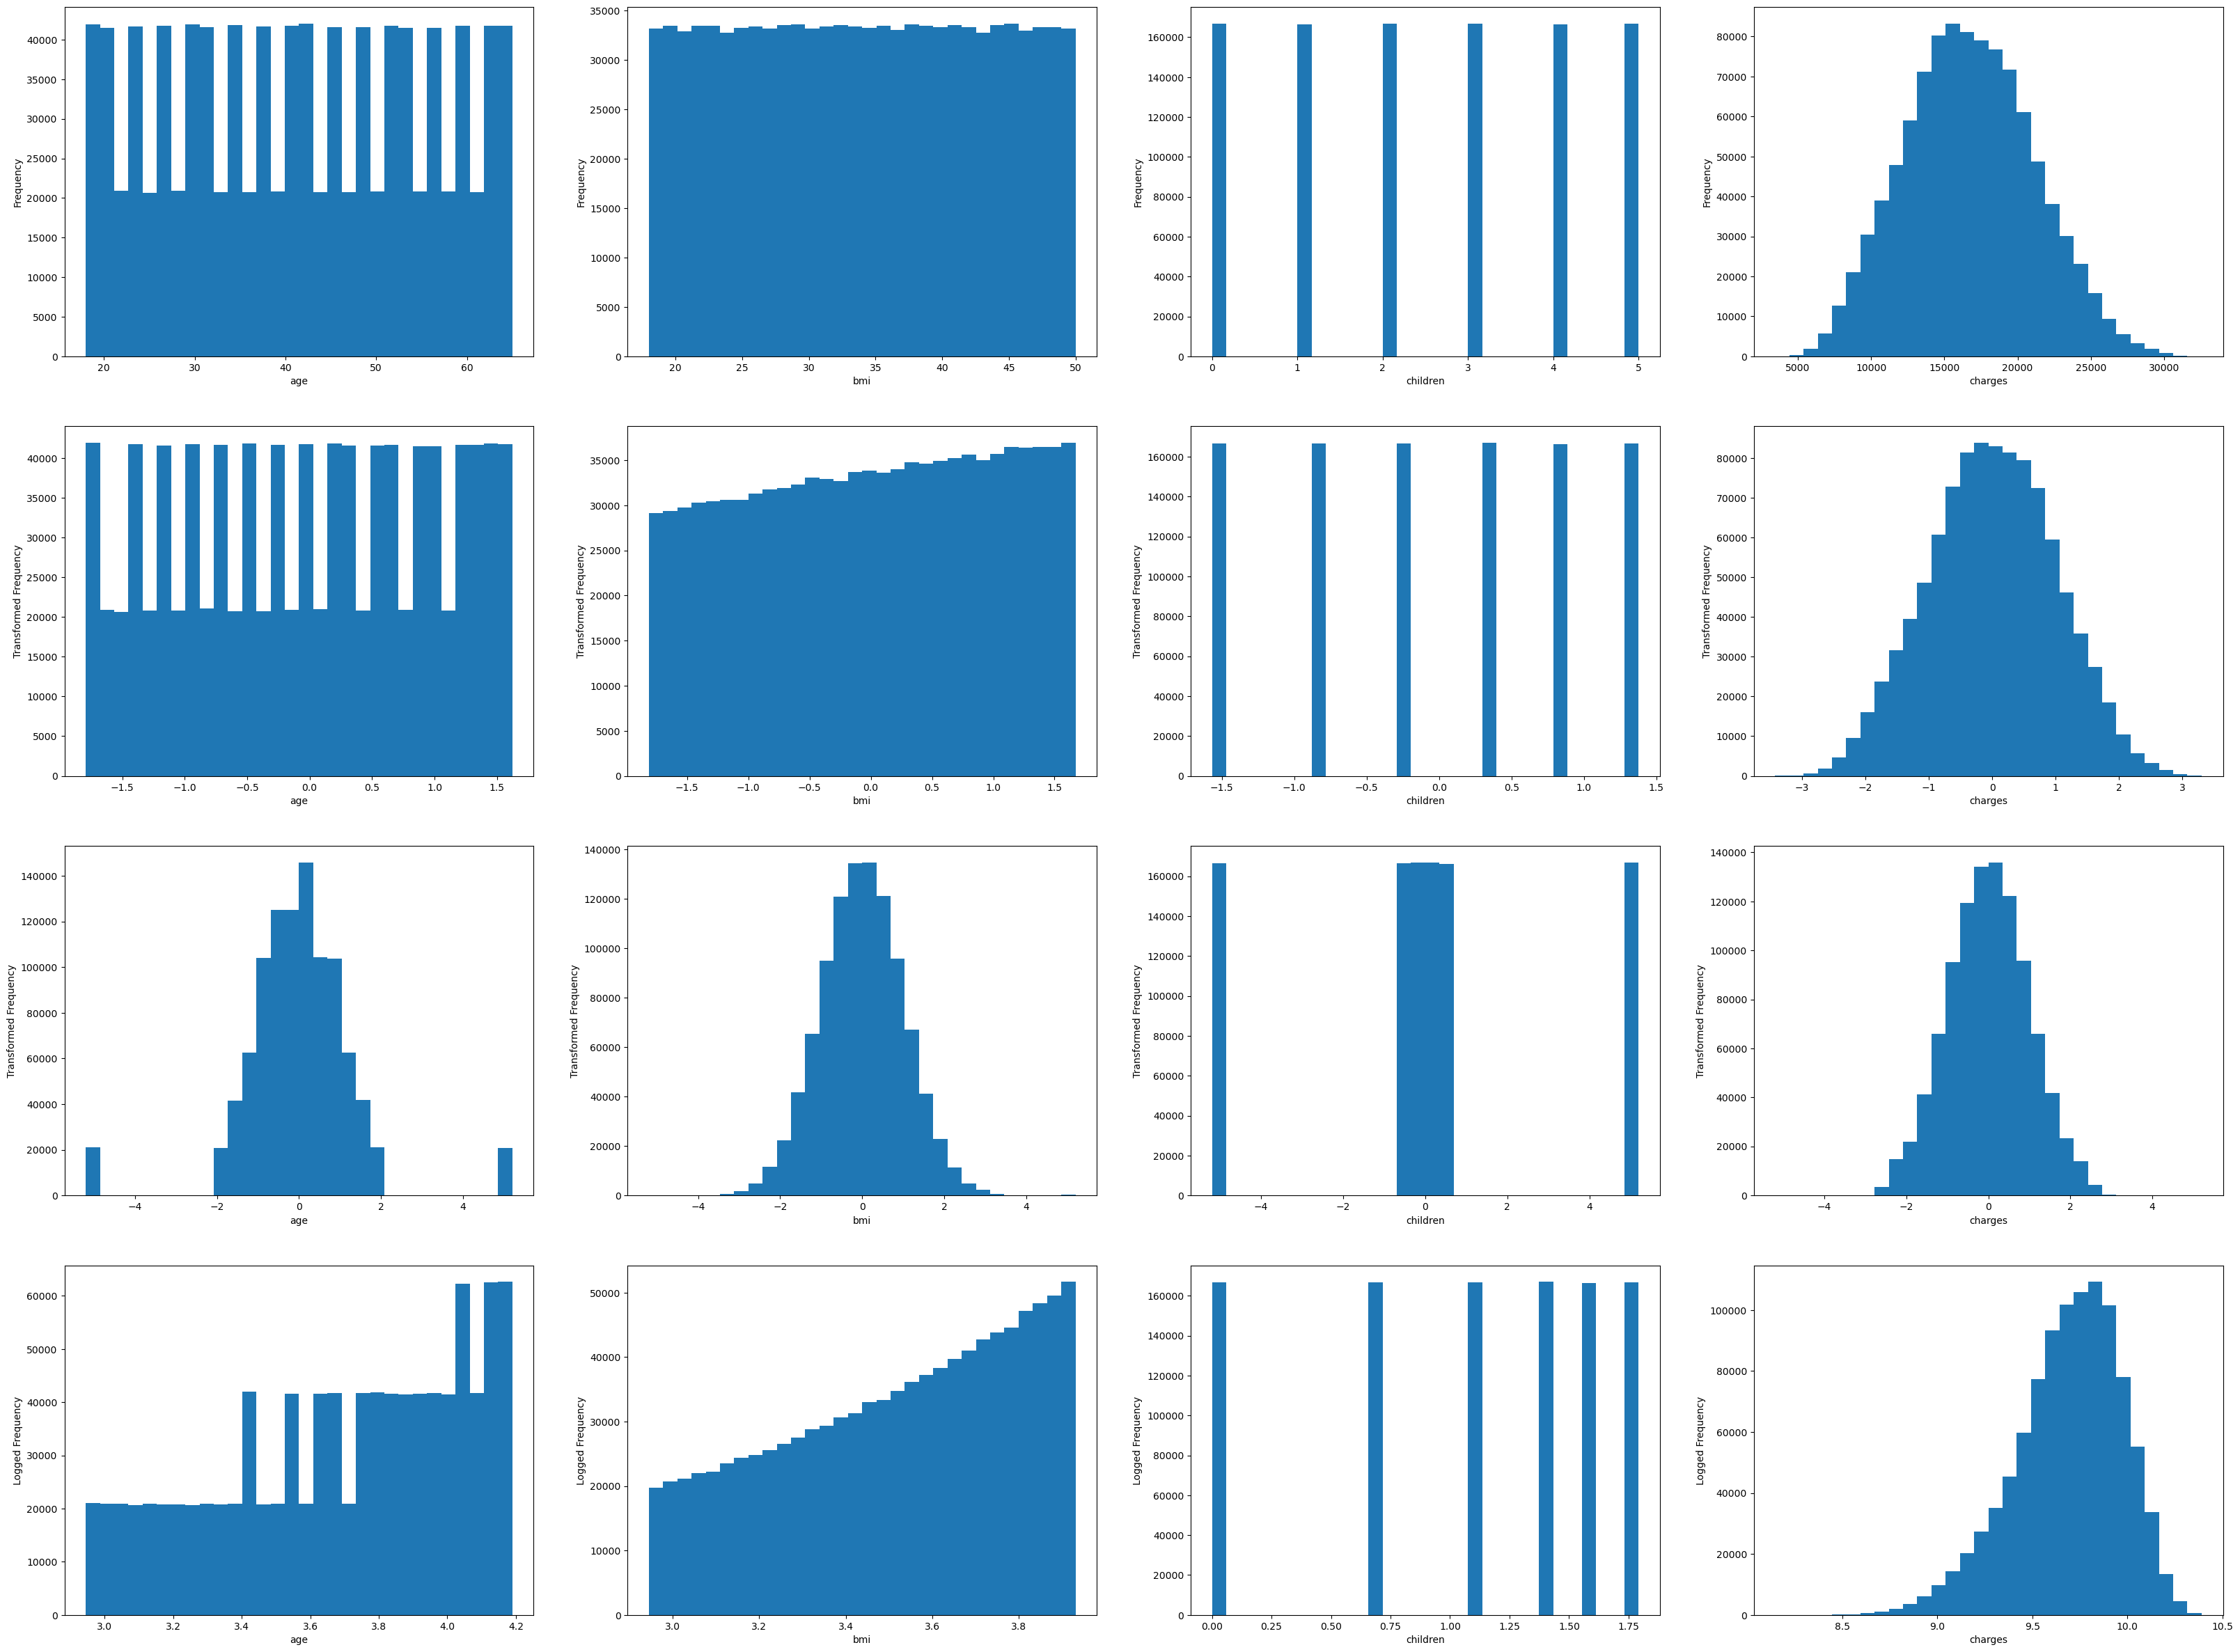

In [19]:
# 숫자형 변수에 대해서 Box-Cox transformation, Quantile transformation/ 변환진행
to_scale = ['age', 'bmi', 'children', 'charges']
df_to_scale = df[to_scale].copy()

quantile = QuantileTransformer(n_quantiles=100, random_state=42, output_distribution='normal')
power = PowerTransformer(method='yeo-johnson')
q_scaled = quantile.fit_transform(df_to_scale)
yj = power.fit_transform(df_to_scale)

q_scaled_df = pd.DataFrame(q_scaled, columns=to_scale)
scaled_df = pd.DataFrame(yj, columns=to_scale)
logged_df = pd.DataFrame(np.log1p(df_to_scale), columns=to_scale)

# plt 사용 코드
fig, ax = plt.subplots(4, 4, figsize=(40, 30))

for i in range(4):
    idx = 0
    for j in range(4): 
        colname = to_scale[idx]
        if i == 0:
            ax[i][j].hist(df_to_scale[colname], bins=30)
            ax[i][j].set_xlabel(colname)
            ax[i][j].set_ylabel('Frequency')
        elif i == 1:
            ax[i][j].hist(scaled_df[colname], bins=30)
            ax[i][j].set_xlabel(colname)
            ax[i][j].set_ylabel('Transformed Frequency')
        elif i == 2:
            ax[i][j].hist(q_scaled_df[colname], bins=30)
            ax[i][j].set_xlabel(colname)
            ax[i][j].set_ylabel('Transformed Frequency')
        elif i == 3:
            ax[i][j].hist(logged_df[colname], bins=30)
            ax[i][j].set_xlabel(colname)
            ax[i][j].set_ylabel('Logged Frequency')
            
        idx += 1

In [20]:
# 먼저 training set과 test set으로 구분
X = df.drop(['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=X['age_bin'])

In [21]:
# Quantile Transformation
to_scale = ['age', 'bmi']

quantile = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')

for col in to_scale:
    quantile.fit(X_train[[col]])
    X_train[col] = quantile.transform(X_train[[col]]).flatten()
    X_test[col] = quantile.transform(X_test[[col]]).flatten()

In [22]:
print(X_train.isnull().sum())
X_train.head()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
age_bin                   0
dtype: int64


,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,age_bin
248750,-0.139710,female,0.005128,2,yes,northeast,High blood pressure,Heart disease,Rarely,Blue collar,Basic,5
521145,-0.492703,female,-2.182222,3,no,northeast,High blood pressure,None,Frequently,Unemployed,Basic,4
449863,-1.220640,female,0.626368,1,no,southwest,Diabetes,None,Frequently,Student,Standard,2
376927,0.430727,male,0.309037,0,yes,southeast,None,Diabetes,Rarely,White collar,Basic,7
246283,1.012893,male,-1.812251,2,yes,southwest,Heart disease,Diabetes,Never,Unemployed,Premium,9


In [23]:
print(X_test.isnull().sum())
X_test.head()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
age_bin                   0
dtype: int64


,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,age_bin
304894,-1.220640,female,-0.033538,0,no,northeast,Heart disease,None,Never,Unemployed,Premium,2
814528,0.253347,male,0.571763,1,no,southeast,Heart disease,Heart disease,Frequently,Unemployed,Basic,7
939118,0.703922,male,0.373365,4,yes,northwest,Heart disease,Heart disease,Never,Blue collar,Standard,8
144980,0.841621,female,-0.883035,4,yes,southwest,High blood pressure,Heart disease,Frequently,Blue collar,Basic,9
174684,0.027855,female,0.905221,0,no,southeast,None,None,Rarely,White collar,Basic,6


In [24]:
# one-hot encoding을 사용해 성별을 바꾸기
onehot_sex = OneHotEncoder()
sex_train = X_train[['sex']]
sex_test = X_test[['sex']]

onehot_sex.fit(sex_train) 
sex_train_onehot = onehot_sex.transform(sex_train).toarray()
sex_test_onehot = onehot_sex.transform(sex_test).toarray()

X_train['sex'] = sex_train_onehot[:, 1].astype(np.uint8) # 여성을 0, 남성을 1로 두고, 정수형으로 
X_test['sex'] = sex_test_onehot[:, 1].astype(np.uint8)

X_train.head()

KeyError: "None of [Index(['sex'], dtype='object')] are in the [columns]"